In [5]:
import os
import shutil

from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *
import numpy as np
from sklearn.utils import shuffle
np.random.seed(1)
from keras import backend as K

import h5py
import sys

from PIL import Image
sys.modules['Image'] = Image

Using TensorFlow backend.


In [24]:
# preprocessing, move files to current project folder use soft link to faster and reduce space usage

keras_download_train = '/home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train'
keras_download_test = '/home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/test'
train_filenames_list = os.listdir(keras_download_train)

train_cat = list(filter(lambda x:x[:3] == 'cat', train_filenames_list))
train_dog = list(filter(lambda x:x[:3] == 'dog', train_filenames_list))


def check_make_dir(*dirs):
    print("example input ('folder1','folder2')")
    for count,dirname in enumerate(dirs):
        if os.path.exists(dirname) and os.path.isdir(dirname):
            shutil.rmtree(dirname)
        os.mkdir(dirname)
        
check_make_dir('train2','train2/cat','train2/dog','test2')

check_make_dir('train','train/cat','train/dog','test','validation','validation/cat','validation/dog')
        
check_make_dir('train3','train3/cat','train3/dog')
    
os.symlink(keras_download_test, 'test2/test')

for filename in train_cat:
    os.symlink(keras_download_train+'/'+filename, 'train2/cat/'+filename)

for filename in train_dog:
    os.symlink(keras_download_train+'/'+filename, 'train2/dog/'+filename)
    
    
os.symlink(keras_download_test, 'train3/test')

for filename in train_cat:
    os.symlink(keras_download_train+'/'+filename, 'train3/cat/'+filename)

for filename in train_dog:
    os.symlink(keras_download_train+'/'+filename, 'train3/dog/'+filename)
    
    

os.symlink(keras_download_test, 'test/test')

for filename in train_cat[:7500]:
    os.symlink(keras_download_train+'/'+filename, 'train/cat/'+filename)

for filename in train_dog[:7500]:
    os.symlink(keras_download_train+'/'+filename, 'train/dog/'+filename)
    
for filename in train_cat[7500:]:
    os.symlink(keras_download_train+'/'+filename, 'validation/cat/'+filename)

for filename in train_dog[7500:]:
    os.symlink(keras_download_train+'/'+filename, 'validation/dog/'+filename)
    

example input ('folder1','folder2')
example input ('folder1','folder2')
example input ('folder1','folder2')


In [27]:
check_make_dir('train3')

NameError: name 'check_make_dir' is not defined

In [6]:
def get_input_shape(img_width, img_height):
    if K.image_data_format() == 'channels_first':
        input_shape = (3,img_width,img_height)
    else:
        input_shape = (img_width,img_height,3)
    return input_shape


In [2]:
# prepare image tensor

image_gen = ImageDataGenerator(featurewise_center=True,fill_mode='constant', 
                               cval=0, horizontal_flip=True, rotation_range=20, shear_range=0.2)

train_gen = image_gen.flow_from_directory("train2", (299, 299), shuffle=False, 
                                    batch_size=32, class_mode=None)

test_gen = image_gen.flow_from_directory("test2", (299, 299), shuffle=False, 
                                         batch_size=32, class_mode=None)

train_filenames = train_gen.filenames
train_nb_samples = len(train_filenames)

test_filenames = test_gen.filenames
test_nb_samples = len(test_filenames)


# define professor X
x = Input((299, 299, 3))
x = InceptionResNetV2(input_tensor=x, weights='imagenet', include_top=False, pooling = 'avg')


train = x.predict_generator(train_gen, steps=train_nb_samples, 
                                            verbose=1)

test = x.predict_generator(test_gen, steps=test_nb_samples, 
                                           verbose=1)
    

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras_preprocessing/image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


12500/12500 [==============================] - 10371s 830ms/step


In [5]:
with h5py.File("gap_{0}.h5".format('InceptionResNetV2')) as h:
    h.create_dataset("train", data=train)
    h.create_dataset("test", data=test)
    h.create_dataset("label", data=train_gen.classes)
        

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


OSError: Can't prepare for writing data (file write failed: time = Thu Aug  2 10:03:41 2018
, filename = 'gap_InceptionResNetV2.h5', file descriptor = 63, errno = 28, error message = 'No space left on device', buf = 0x7ff4c6973fb0, total write size = 1868353632, bytes this sub-write = 1868353632, bytes actually written = 18446744073709551615, offset = 10408222720)

In [28]:
ls -ltrh

total 9.7G
-rw-rw-r-- 1 ubuntu ubuntu  19K Aug  1 23:58 Untitled.ipynb
-rw-rw-r-- 1 ubuntu ubuntu    6 Aug  1 23:58 README.md
-rw-rw-r-- 1 ubuntu ubuntu  91K Aug  1 23:58 model.h5_save
drwxrwxr-x 2 ubuntu ubuntu 4.0K Aug  1 23:58 uda/
-rw-rw-r-- 1 ubuntu ubuntu 112K Aug  1 23:58 sample_submission.csv
-rw-rw-r-- 1 ubuntu ubuntu 307K Aug  1 23:58 pred.csv
drwxrwxr-x 4 ubuntu ubuntu 4.0K Aug  2 00:00 train2/
drwxrwxr-x 2 ubuntu ubuntu 4.0K Aug  2 00:00 test2/
-rw-rw-r-- 1 ubuntu ubuntu  14K Aug  2 09:52 graduation_project.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 9.7G Aug  2 10:03 gap_InceptionResNetV2.h5


In [32]:
rm -rf /home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/*.zip

In [29]:
ls -ltrh /home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/*.zip

-rw-rw-r-- 1 ubuntu ubuntu 272M Aug  1 23:47 /home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/test.zip
-rw-rw-r-- 1 ubuntu ubuntu 544M Aug  1 23:47 /home/ubuntu/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train.zip


In [31]:
ls -ltrh /home/ubuntu/

total 1.1G
-rw-rw-r--  1 ubuntu ubuntu 294M May 25  2017 gap_Xception.h5
-rw-rw-r--  1 ubuntu ubuntu  74M May 25  2017 gap_VGG19.h5
-rw-rw-r--  1 ubuntu ubuntu  74M May 25  2017 gap_VGG16.h5
-rw-rw-r--  1 ubuntu ubuntu 294M May 25  2017 gap_ResNet50.h5
-rw-rw-r--  1 ubuntu ubuntu 294M May 25  2017 gap_InceptionV3.h5
-rw-rw-r--  1 ubuntu ubuntu 2.8M Jul 18 02:00 Nvidia_Cloud_EULA.pdf
drwxrwxr-x  5 ubuntu ubuntu 4.0K Jul 19 18:10 tutorials/
drwxrwxr-x  8 ubuntu ubuntu 4.0K Jul 19 18:10 examples/
-rw-rw-r--  1 ubuntu ubuntu 2.8K Jul 19 18:11 README
drwxrwxr-x 24 ubuntu ubuntu 4.0K Jul 19 19:15 anaconda3/
drwxrwxr-x 10 ubuntu ubuntu 4.0K Jul 19 19:59 src/
-rw-rw-r--  1 ubuntu ubuntu 112K Aug  1 23:46 sample_submission.csv
drwxrwxr-x  7 ubuntu ubuntu 4.0K Aug  2 10:07 uda/


In [ ]:

def write_gap(MODEL, image_size, lambda_func=None):
    width = image_size[0]
    height = image_size[1]
    x = Input((height, width, 3))
    if lambda_func:
        x = Lambda(lambda_func)(x)

    base_model = MODEL(input_tensor=x, weights='imagenet', include_top=False)
    model = Model(base_model.input, GlobalAveragePooling2D()(base_model.output))

    gen = ImageDataGenerator()
    train_generator = gen.flow_from_directory("train2", image_size, shuffle=False, 
                                              batch_size=16)
    test_generator = gen.flow_from_directory("test2", image_size, shuffle=False, 
                                             batch_size=16, class_mode=None)
    print("stage2")

    #my add starts
    train_filenames = train_generator.filenames
    train_nb_samples = len(train_filenames)

    test_filenames = test_generator.filenames
    test_nb_samples = len(test_filenames)
    
    #my add finish
    
    print("{}".format(MODEL.__name__))
    print("stage3")
    
    train = model.predict_generator(train_generator,steps=train_nb_samples,verbose=1)
    test = model.predict_generator(test_generator,steps=test_nb_samples,verbose=1)
    
    print("stage4")

                                   
    with h5py.File("gap_%s.h5"%MODEL.__name__) as h:
        h.create_dataset("train", data=train)
        h.create_dataset("test", data=test)
        h.create_dataset("label", data=train_generator.classes)
        
write_gap(ResNet50, (224, 224), resnet50.preprocess_input)
        
'''
write_gap(InceptionResNetV2, (299, 299), inception_resnet_v2.preprocess_input)


write_gap(ResNet50, (224, 224), resnet50.preprocess_input)
write_gap(InceptionV3, (299, 299), inception_v3.preprocess_input)
write_gap(Xception, (299, 299), xception.preprocess_input)
'''


Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
stage2
ResNet50
stage3
  290/25000 [..............................] - ETA: 1:00:45

In [6]:
print("test")

test


In [3]:
K.tensorflow_backend._get_available_gpus()

[]

In [11]:
import tensorflow as tf
import keras
config = tf.ConfigProto( device_count = {'GPU':1,'CPU':4})
sess = tf.Session(config=config)
keras.backend.set_session(sess)

In [13]:
K.tensorflow_backend._get_available_gpus()


[]

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4115043072748787727
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11284542260
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16765282053076248631
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"
]


In [4]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print("{}".format(tf.test.gpu_device_name()))
else:
    print("plz install gpu version")

/device:GPU:0


NameError: name 'input_model' is not defined

In [25]:
from keras.applications.inception_resnet_v2 import preprocess_input

img_width, img_height = 299,299

epochs = 10
batch_size = 16

base_model = Sequential()
base_model.add(Conv2D(32,(3,3), input_shape=get_input_shape(img_width,img_height)))
base_model.add(Activation('relu'))
base_model.add(MaxPooling2D(pool_size=(2,2)))

base_model.add(Conv2D(32,(3,3)))
base_model.add(Activation('relu'))
base_model.add(MaxPooling2D(pool_size=(2,2)))

base_model.add(Conv2D(64,(3,3)))
base_model.add(Activation('relu'))
base_model.add(MaxPooling2D(pool_size=(2,2)))

base_model.add(Flatten())
base_model.add(Dense(64))
base_model.add(Activation('relu'))
base_model.add(Dropout(0.5))
base_model.add(Dense(1))
base_model.add(Activation('sigmoid'))

base_model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

#seems rescale is very important.
#image_gen = ImageDataGenerator(featurewise_center=False,fill_mode='nearest',
#                               cval=0,horizontal_flip=True,rotation_range=20,shear_range=0.2,rescale=1./255)



image_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# validation_split=0.4, cval=0, fill_mode='constant'

train_gen = image_gen.flow_from_directory("train", (img_width,img_height), shuffle=True,
                                    batch_size=16,class_mode='binary')# subset = "training",class_mode="categorical" ,interpolation='bicubic',

validation_gen = image_gen.flow_from_directory("validation", (img_width,img_height), shuffle=True,
                                    batch_size=16, class_mode='binary') # 'binary',,interpolation='bicubic',

test_gen = image_gen.flow_from_directory("test", (img_width,img_height), shuffle=False, 
                                         batch_size=8, class_mode=None)


Found 15000 images belonging to 2 classes.
Found 9992 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [5]:
net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x) 
output_layer = Dense(1, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:100]: 
    layer.trainable = False 
for layer in net_final.layers[100:]: 
    layer.trainable = True 

net_final.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


# train the model 
history=net_final.fit_generator(generator=train_gen,
                    validation_data=validation_gen,epochs=25)

Epoch 1/25
1063/1063 [==============================] - 1740s 2s/step - loss: 0.5810 - acc: 0.8876 - val_loss: 0.4140 - val_acc: 0.8664
Epoch 2/25
1063/1063 [==============================] - 1653s 2s/step - loss: 0.3496 - acc: 0.9324 - val_loss: 0.7277 - val_acc: 0.8818
Epoch 3/25
1063/1063 [==============================] - 1655s 2s/step - loss: 0.2149 - acc: 0.9509 - val_loss: 1.3040 - val_acc: 0.8817
Epoch 4/25
1063/1063 [==============================] - 1651s 2s/step - loss: 0.1203 - acc: 0.9658 - val_loss: 0.1403 - val_acc: 0.9525
Epoch 5/25
1063/1063 [==============================] - 1651s 2s/step - loss: 0.1072 - acc: 0.9702 - val_loss: 0.0882 - val_acc: 0.9707
Epoch 6/25
1063/1063 [==============================] - 1655s 2s/step - loss: 0.2139 - acc: 0.9674 - val_loss: 0.1273 - val_acc: 0.9609
Epoch 7/25
1063/1063 [==============================] - 1651s 2s/step - loss: 0.0933 - acc: 0.9769 - val_loss: 0.1290 - val_acc: 0.9650
Epoch 8/25
1063/1063 [==========================

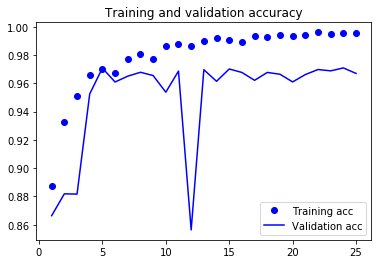

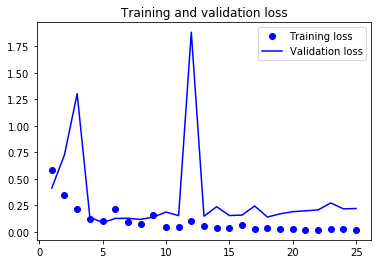

In [7]:
%matplotlib inline  
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [8]:
net_final.save_weights('My_InceptionResNetV2_BETA.h5')

In [ ]:
from keras.optimizers import SGD

net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x) 
output_layer = Dense(1, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:350]: 
    layer.trainable = False 
for layer in net_final.layers[350:]: 
    layer.trainable = True 

#my_optimizer = SGD(lr=0.0001, momentum=0.9)
    
net_final.compile(optimizer='adadelta', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


# train the model 
history=net_final.fit_generator(generator=train_gen,
                    validation_data=validation_gen,epochs=25)#shuffle=True

Epoch 1/25
1250/1250 [==============================] - 1609s 1s/step - loss: 0.3827 - acc: 0.8871 - val_loss: 0.1145 - val_acc: 0.9800
Epoch 2/25
1250/1250 [==============================] - 1532s 1s/step - loss: 0.1017 - acc: 0.9732 - val_loss: 0.0533 - val_acc: 0.9820
Epoch 3/25
1250/1250 [==============================] - 1531s 1s/step - loss: 0.1018 - acc: 0.9818 - val_loss: 0.0854 - val_acc: 0.9802
Epoch 4/25
1250/1250 [==============================] - 1531s 1s/step - loss: 0.0628 - acc: 0.9867 - val_loss: 0.0519 - val_acc: 0.9836
Epoch 5/25
1250/1250 [==============================] - 1533s 1s/step - loss: 0.1537 - acc: 0.9828 - val_loss: 0.1008 - val_acc: 0.9806
Epoch 6/25
1250/1250 [==============================] - 1534s 1s/step - loss: 0.0386 - acc: 0.9916 - val_loss: 0.0875 - val_acc: 0.9796
Epoch 7/25
1250/1250 [==============================] - 1535s 1s/step - loss: 0.0292 - acc: 0.9938 - val_loss: 0.1138 - val_acc: 0.9792
Epoch 8/25
1250/1250 [==========================

In [9]:
net_final.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_7[0][0]                   
__________________________________________________________________________________________________
activation_11 (Activation)      (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_8 (

In [6]:
net_final.save_weights('My_InceptionResNetV2_SIN_V1.h5')

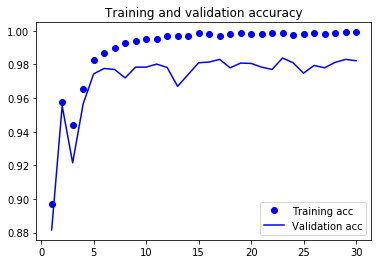

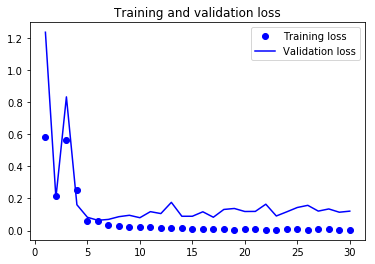

In [23]:
%matplotlib inline  
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

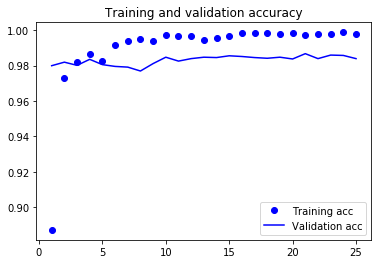

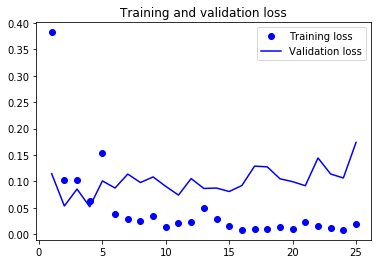

In [9]:
%matplotlib inline  
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
from keras.optimizers import SGD

net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x) 
output_layer = Dense(1, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:450]: 
    layer.trainable = False 
for layer in net_final.layers[450:]: 
    layer.trainable = True 

#my_optimizer = SGD(lr=0.0001, momentum=0.9)
    
net_final.compile(optimizer='adadelta', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


# train the model 
history=net_final.fit_generator(generator=train_gen,
                    validation_data=validation_gen,epochs=5)#shuffle=True

Epoch 1/5
1250/1250 [==============================] - 1354s 1s/step - loss: 0.2057 - acc: 0.9455 - val_loss: 0.0846 - val_acc: 0.9804
Epoch 2/5
1250/1250 [==============================] - 1318s 1s/step - loss: 0.0742 - acc: 0.9786 - val_loss: 0.0386 - val_acc: 0.9864
Epoch 3/5
1250/1250 [==============================] - 1317s 1s/step - loss: 0.0471 - acc: 0.9871 - val_loss: 0.0784 - val_acc: 0.9840
Epoch 4/5
1250/1250 [==============================] - 1317s 1s/step - loss: 0.0350 - acc: 0.9908 - val_loss: 0.0360 - val_acc: 0.9882
Epoch 5/5
1250/1250 [==============================] - 1316s 1s/step - loss: 0.0329 - acc: 0.9924 - val_loss: 0.0284 - val_acc: 0.9916


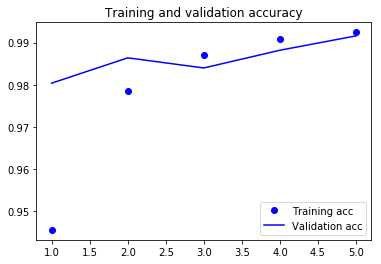

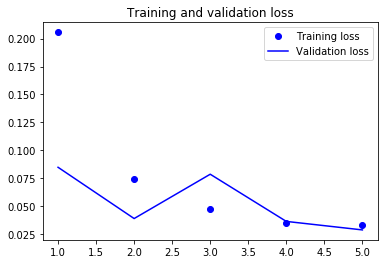

In [14]:
%matplotlib inline  
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
from keras.optimizers import SGD

net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x) 
output_layer = Dense(1, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:520]: 
    layer.trainable = False 
for layer in net_final.layers[520:]: 
    layer.trainable = True 

#my_optimizer = SGD(lr=0.0001, momentum=0.9)
    
net_final.compile(optimizer='adadelta', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


# train the model 
history=net_final.fit_generator(generator=train_gen,
                    validation_data=validation_gen,epochs=8)#shuffle=True

Epoch 1/8
938/938 [==============================] - 1114s 1s/step - loss: 0.2164 - acc: 0.9456 - val_loss: 0.1511 - val_acc: 0.9734
Epoch 2/8
938/938 [==============================] - 1075s 1s/step - loss: 0.0573 - acc: 0.9843 - val_loss: 0.0327 - val_acc: 0.9892
Epoch 3/8
938/938 [==============================] - 1076s 1s/step - loss: 0.0464 - acc: 0.9885 - val_loss: 0.0367 - val_acc: 0.9901
Epoch 4/8
938/938 [==============================] - 1076s 1s/step - loss: 0.0321 - acc: 0.9918 - val_loss: 0.0430 - val_acc: 0.9885
Epoch 5/8
938/938 [==============================] - 1076s 1s/step - loss: 0.0259 - acc: 0.9942 - val_loss: 0.0340 - val_acc: 0.9895
Epoch 6/8
938/938 [==============================] - 1071s 1s/step - loss: 0.0257 - acc: 0.9944 - val_loss: 0.0379 - val_acc: 0.9921
Epoch 7/8
938/938 [==============================] - 1070s 1s/step - loss: 0.0149 - acc: 0.9970 - val_loss: 0.0592 - val_acc: 0.9874
Epoch 8/8
938/938 [==============================] - 1069s 1s/step - 

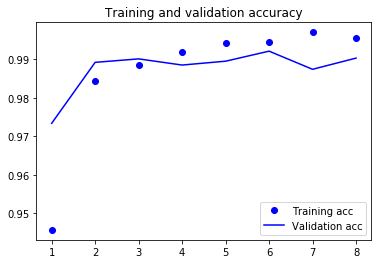

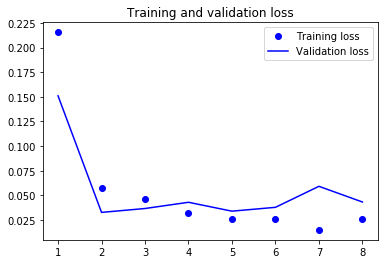

In [27]:
%matplotlib inline  
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [7]:
net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dropout(0.5)(x) 
output_layer = Dense(2, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:100]: 
    layer.trainable = False 
for layer in net_final.layers[100:]: 
    layer.trainable = True 

#my_optimizer=
    
net_final.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


net_final.load_weights('My_InceptionResNetV2_BETA.h5')

In [8]:
ls -ltr

total 10593496
-rw-rw-r-- 1 ubuntu ubuntu       18950 Aug  1 23:58 Untitled.ipynb
-rw-rw-r-- 1 ubuntu ubuntu           6 Aug  1 23:58 README.md
-rw-rw-r-- 1 ubuntu ubuntu       92952 Aug  1 23:58 model.h5_save
drwxrwxr-x 2 ubuntu ubuntu        4096 Aug  1 23:58 uda/
-rw-rw-r-- 1 ubuntu ubuntu      113903 Aug  1 23:58 sample_submission.csv
-rw-rw-r-- 1 ubuntu ubuntu      313693 Aug  1 23:58 pred.csv
-rw-rw-r-- 1 ubuntu ubuntu 10408222720 Aug  2 10:03 gap_InceptionResNetV2.h5
-rw-rw-r-- 1 ubuntu ubuntu   219796776 Aug  7 23:15 My_InceptionResNetV2_BETA.h5
drwxrwxr-x 4 ubuntu ubuntu        4096 Aug  8 15:12 train2/
drwxrwxr-x 4 ubuntu ubuntu        4096 Aug  8 15:12 train/
drwxrwxr-x 4 ubuntu ubuntu        4096 Aug  8 15:12 validation/
drwxrwxr-x 2 ubuntu ubuntu        4096 Aug  8 15:12 test2/
drwxrwxr-x 2 ubuntu ubuntu        4096 Aug  8 15:12 test/
-rw-rw-r-- 1 ubuntu ubuntu   219005688 Aug  9 16:42 My_InceptionResNetV2_BETA_V2.h5
-rw-rw-r-- 1 ubuntu ubuntu       79000 Aug 10 12:45 grad

In [9]:
cat sample_submission.csv

id,label
1,0.5
2,0.5
3,0.5
4,0.5
5,0.5
6,0.5
7,0.5
8,0.5
9,0.5
10,0.5
11,0.5
12,0.5
13,0.5
14,0.5
15,0.5
16,0.5
17,0.5
18,0.5
19,0.5
20,0.5
21,0.5
22,0.5
23,0.5
24,0.5
25,0.5
26,0.5
27,0.5
28,0.5
29,0.5
30,0.5
31,0.5
32,0.5
33,0.5
34,0.5
35,0.5
36,0.5
37,0.5
38,0.5
39,0.5
40,0.5
41,0.5
42,0.5
43,0.5
44,0.5
45,0.5
46,0.5
47,0.5
48,0.5
49,0.5
50,0.5
51,0.5
52,0.5
53,0.5
54,0.5
55,0.5
56,0.5
57,0.5
58,0.5
59,0.5
60,0.5
61,0.5
62,0.5
63,0.5
64,0.5
65,0.5
66,0.5
67,0.5
68,0.5
69,0.5
70,0.5
71,0.5
72,0.5
73,0.5
74,0.5
75,0.5
76,0.5
77,0.5
78,0.5
79,0.5
80,0.5
81,0.5
82,0.5
83,0.5
84,0.5
85,0.5
86,0.5
87,0.5
88,0.5
89,0.5
90,0.5
91,0.5
92,0.5
93,0.5
94,0.5
95,0.5
96,0.5
97,0.5
98,0.5
99,0.5
100,0.5
101,0.5
102,0.5
103,0.5
104,0.5
105,0.5
106,0.5
107,0.5
108,0.5
109,0.5
110,0.5
111,0.5
112,0.5
113,0.5
114,0.5
115,0.5
116,0.5
117,0.5
118,0.5
119,0.5
120,0.5
121,0.5
122,0.5
123,0.5
124,0.5
125,0.5
126,0.5
127,0.5
128,0.5
129,0.5
130,0.5
131,0.5
132,0.5
133,0.5
134,0.5
135,0.5
136,0.5
137,0.5
138

In [29]:
import pandas as pd

from keras.applications.inception_resnet_v2 import preprocess_input

df = pd.read_csv("sample_submission.csv")


image_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# validation_split=0.4, cval=0, fill_mode='constant'


test_gen = image_gen.flow_from_directory("test/", (299,299), shuffle=False, 
                                         batch_size=8, class_mode='binary')


result = net_final.predict_generator(generator=test_gen, verbose=1)

Found 12500 images belonging to 1 classes.
1563/1563 [==============================] - 420s 269ms/step


In [30]:
print(len(result))

print(result[12499])

12500
[1.00000e+00 1.16926e-17]


In [28]:
import glob

import re

file_list = sorted(glob.glob('test/test/*'),key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
i=1
a=list()
for file in file_list:
    i += 1
    print(i)
    img = image.load_img(file, target_size=(299, 299)) 
    # 图像预处理 
    x = image.img_to_array(img) 
    x = np.expand_dims(x, axis=0) 
    x = preprocess_input(x) 
    # 对图像进行分类 
    preds = net_final.predict(x)
    print(preds[0][0])
    a.append(preds[0])

print(a)


    
    
    

2
1.0
3
1.0
4
1.0
5
1.0
6
2.1413051e-07
7
8.5278974e-05
8
0.0
9
1.2029637e-14
10
1.273013e-11
11
1.2619778e-32
12
2.3840509e-15
13
1.0
14
9.675137e-12
15
1.9754803e-05
16
1.1184882e-20
17
7.964092e-06
18
0.99999905
19
1.0
20
4.6375096e-12
21
1.5834031e-21
22
1.0
23
2.3775356e-05
24
1.0
25
0.99999833
26
2.3515445e-37
27
1.0
28
1.0
29
5.285731e-18
30
0.5723446
31
1.0
32
1.0
33
0.98688394
34
0.9999964
35
6.8922026e-20
36
9.028125e-29
37
5.422403e-07
38
3.2007763e-33
39
1.6133241e-33
40
1.0
41
3.94418e-13
42
1.0
43
1.0
44
1.0
45
1.0
46
1.3044282e-14
47
1.0
48
3.531471e-16
49
1.0
50
1.0
51
3.2153155e-10
52
1.2664281e-26
53
7.875954e-26
54
1.2256448e-25
55
3.7935985e-26
56
1.2854301e-33
57
1.0
58
1.0
59
1.0892259e-17
60
1.0
61
4.9335146e-20
62
1.6524783e-10
63
1.0
64
1.3659369e-29
65
9.605374e-20
66
1.0
67
1.0
68
1.0
69
1.1738441e-34
70
1.0
71
1.0
72
1.0
73
0.9999999
74
1.0
75
1.0
76
1.9959633e-17
77
1.0
78
1.0
79
1.0
80
1.0
81
2.0800484e-23
82
0.000394145
83
2.081902e-34
84
1.0
85
0.0003052

0.5442832
637
1.0
638
1.0
639
9.715379e-19
640
4.5706403e-30
641
7.0022205e-24
642
0.9998528
643
9.3420796e-20
644
1.0
645
1.0
646
2.33465e-08
647
6.0978584e-15
648
2.9783767e-09
649
7.717433e-19
650
5.6464704e-09
651
1.0
652
1.0
653
1.0
654
7.715048e-19
655
1.0
656
1.0
657
1.0
658
1.0
659
1.0
660
0.0
661
0.0
662
1.0
663
1.5276861e-14
664
4.788819e-12
665
5.1332006e-14
666
1.2347757e-06
667
0.00030028206
668
0.9999975
669
1.0
670
1.0
671
1.0
672
1.5972552e-26
673
8.509969e-05
674
3.55541e-12
675
6.2442564e-21
676
0.0047834506
677
1.0
678
1.9104161e-20
679
0.9277654
680
1.0
681
3.1838094e-09
682
1.0
683
5.233245e-06
684
1.2312089e-11
685
1.0
686
1.0
687
1.0
688
1.0
689
1.0
690
4.655467e-26
691
0.023321833
692
1.0
693
1.8601654e-32
694
1.0
695
1.0
696
1.0
697
8.93697e-12
698
0.00028299756
699
1.3056349e-11
700
2.3758085e-29
701
1.0
702
2.5082642e-07
703
8.209727e-12
704
8.273493e-10
705
2.2297172e-10
706
0.9999968
707
1.0
708
1.0
709
1.0
710
1.0
711
0.9999999
712
1.1255019e-11
713
1.0
71

1.0
1255
2.9092586e-29
1256
4.9914066e-11
1257
2.5499085e-16
1258
1.0
1259
5.7234942e-11
1260
1.3213756e-26
1261
1.9689404e-27
1262
1.0
1263
6.282965e-28
1264
2.133823e-08
1265
1.1429174e-28
1266
1.4687932e-23
1267
6.755642e-14
1268
0.8209742
1269
8.680783e-19
1270
1.0
1271
3.9487654e-20
1272
1.0
1273
1.0
1274
0.9999999
1275
4.5440495e-19
1276
1.0
1277
1.0
1278
1.0538786e-18
1279
3.3300425e-09
1280
1.0
1281
1.0
1282
1.5699258e-12
1283
0.0005407368
1284
1.0
1285
1.0
1286
1.8264431e-24
1287
1.0
1288
2.177365e-09
1289
1.7281849e-05
1290
1.0
1291
1.0
1292
2.3988715e-18
1293
0.13853183
1294
3.7699902e-22
1295
1.0
1296
1.325265e-15
1297
0.09910251
1298
0.0
1299
9.698954e-08
1300
7.372575e-14
1301
9.236162e-28
1302
1.0
1303
7.1979906e-09
1304
4.349452e-17
1305
1.0
1306
1.0
1307
1.0
1308
4.0217404e-10
1309
1.0
1310
2.6001556e-09
1311
1.7205575e-30
1312
2.8282018e-10
1313
1.0
1314
3.0092586e-12
1315
1.0
1316
0.99989223
1317
3.4632346e-11
1318
0.9999999
1319
1.0
1320
0.9999596
1321
0.22497219
13

2.655012e-35
1837
6.6805224e-16
1838
1.0
1839
1.0
1840
1.5751084e-20
1841
1.0
1842
1.0
1843
1.0
1844
8.602206e-09
1845
3.0440053e-23
1846
1.0
1847
0.99999976
1848
4.837988e-17
1849
1.0
1850
1.0
1851
1.0
1852
1.0
1853
9.6989276e-36
1854
1.0
1855
0.0
1856
0.99996316
1857
0.9999999
1858
1.3804516e-11
1859
1.6405138e-06
1860
1.0
1861
1.0
1862
1.5319397e-26
1863
1.2329404e-34
1864
1.0
1865
8.253636e-28
1866
1.0
1867
1.0
1868
3.3635588e-06
1869
1.8500745e-13
1870
3.91633e-21
1871
4.1407316e-21
1872
1.0
1873
1.0
1874
0.99999857
1875
1.0
1876
5.3141194e-13
1877
1.0
1878
1.0
1879
1.0
1880
8.7582315e-08
1881
1.2595659e-21
1882
1.0
1883
1.0
1884
1.0364351e-05
1885
0.9999912
1886
0.9727621
1887
1.0
1888
0.04013942
1889
1.0
1890
1.8827052e-22
1891
5.921696e-20
1892
1.0
1893
0.99965906
1894
1.7440574e-21
1895
7.150099e-35
1896
0.99993944
1897
4.121719e-05
1898
2.4694251e-20
1899
1.2594944e-20
1900
7.691498e-37
1901
1.0336835e-19
1902
3.412135e-20
1903
0.99999976
1904
1.0
1905
1.0
1906
1.0
1907
1.0
1

3.156639e-18
2428
2.076927e-09
2429
1.0
2430
1.6138982e-05
2431
1.0
2432
1.0
2433
0.9999988
2434
1.0
2435
2.1717505e-19
2436
1.04847554e-10
2437
1.3568442e-05
2438
1.0
2439
1.0
2440
0.0
2441
2.153192e-17
2442
0.29802918
2443
1.0
2444
3.2769547e-26
2445
1.0
2446
1.0
2447
9.329212e-06
2448
1.0
2449
1.0
2450
1.3867225e-10
2451
1.0
2452
1.0
2453
1.0
2454
3.5170464e-23
2455
4.516474e-09
2456
2.82583e-17
2457
0.99986005
2458
1.0
2459
1.839941e-15
2460
1.0
2461
7.0141466e-23
2462
2.5540935e-13
2463
0.999998
2464
5.1505254e-12
2465
1.0
2466
1.0
2467
0.9993401
2468
1.0
2469
1.0
2470
1.0
2471
1.0
2472
1.0
2473
1.0
2474
4.5084156e-10
2475
0.9999999
2476
0.12324354
2477
1.0
2478
3.0836938e-07
2479
1.0
2480
3.0338598e-13
2481
2.5975495e-27
2482
1.0
2483
1.0
2484
1.0
2485
1.0
2486
3.1302533e-10
2487
5.0742466e-11
2488
1.0
2489
5.3915417e-05
2490
1.0
2491
1.0
2492
1.0
2493
0.0
2494
7.8899185e-38
2495
1.0
2496
0.00015218792
2497
0.29221514
2498
3.1327482e-11
2499
1.0
2500
1.4475862e-27
2501
2.613363e-

6.983467e-09
3019
1.0
3020
1.0
3021
0.9999981
3022
1.0
3023
5.819394e-15
3024
2.0842972e-31
3025
1.0
3026
6.3440325e-31
3027
2.7704884e-38
3028
1.268568e-22
3029
1.0
3030
1.0
3031
6.8579916e-06
3032
0.00014111905
3033
1.0
3034
1.1748552e-10
3035
1.4796077e-30
3036
0.0
3037
1.0531122e-12
3038
1.0
3039
1.0
3040
0.99999905
3041
3.5895112e-06
3042
0.99999976
3043
1.8825244e-16
3044
1.0
3045
1.0
3046
0.9999907
3047
0.0
3048
5.92332e-21
3049
6.080524e-32
3050
0.78038913
3051
1.0
3052
1.0
3053
1.0
3054
4.4420973e-12
3055
7.251894e-14
3056
3.0094677e-14
3057
4.1993472e-22
3058
0.998914
3059
1.9955436e-05
3060
1.0
3061
1.0
3062
1.0
3063
1.0
3064
2.9032803e-12
3065
1.0
3066
0.9999994
3067
1.0
3068
4.2590525e-08
3069
1.0
3070
0.9999956
3071
1.0
3072
2.4178706e-18
3073
1.0
3074
1.0
3075
1.0
3076
1.0
3077
1.0
3078
4.2646796e-11
3079
1.0
3080
1.2215631e-21
3081
6.727009e-05
3082
4.5302768e-05
3083
1.0
3084
1.0
3085
7.182638e-18
3086
1.0
3087
0.99989235
3088
2.7175814e-19
3089
5.405131e-35
3090
1.0
3

1.1403874e-20
3613
1.6864535e-32
3614
1.0
3615
0.015937747
3616
1.0
3617
1.3408656e-16
3618
9.01625e-14
3619
1.04604256e-10
3620
3.3256788e-06
3621
9.4448576e-33
3622
1.0
3623
3.4981532e-23
3624
1.0
3625
1.0224918e-13
3626
0.9234956
3627
1.0
3628
1.0
3629
4.8925944e-30
3630
7.431803e-10
3631
1.0
3632
1.0
3633
1.0
3634
1.0
3635
1.0
3636
3.1455252e-15
3637
3.422129e-11
3638
0.99919385
3639
6.6857126e-19
3640
2.4057803e-34
3641
0.026191058
3642
0.99999976
3643
0.9993523
3644
0.74204445
3645
0.0
3646
1.0
3647
1.0
3648
1.3880945e-27
3649
1.0
3650
1.9998291e-15
3651
1.0
3652
1.2602265e-10
3653
6.334841e-06
3654
1.0
3655
1.659705e-33
3656
1.0
3657
1.3424021e-22
3658
2.3416338e-38
3659
1.0
3660
1.0
3661
1.332831e-05
3662
1.0
3663
0.00062170386
3664
5.724856e-12
3665
1.0
3666
3.1402286e-07
3667
1.13129696e-20
3668
4.8191973e-18
3669
4.8692703e-09
3670
1.0
3671
1.8756535e-20
3672
0.56000257
3673
5.6507393e-27
3674
9.87436e-08
3675
1.0
3676
1.0
3677
1.0
3678
0.9998627
3679
1.9962628e-22
3680
0.0


6.0484965e-20
4204
0.9999815
4205
2.745528e-19
4206
2.4177366e-06
4207
1.0
4208
2.175946e-12
4209
1.0
4210
8.590736e-15
4211
1.0
4212
1.1430995e-07
4213
1.8357836e-15
4214
6.841746e-06
4215
1.0482331e-07
4216
1.0
4217
1.0
4218
2.3536853e-14
4219
1.0
4220
1.0
4221
3.309469e-17
4222
2.536446e-10
4223
9.839762e-09
4224
1.0
4225
1.0
4226
3.692157e-20
4227
4.046398e-15
4228
0.0
4229
4.2238275e-24
4230
1.0
4231
1.0
4232
1.0
4233
9.755632e-20
4234
1.0
4235
0.00032148007
4236
1.0
4237
3.0555874e-34
4238
0.9999753
4239
1.0
4240
2.366596e-10
4241
1.0
4242
2.979624e-37
4243
1.0
4244
1.0
4245
3.2678095e-08
4246
1.0
4247
0.99996674
4248
1.0
4249
0.999974
4250
5.148772e-14
4251
1.3788577e-10
4252
1.0
4253
0.9944923
4254
1.25236836e-23
4255
3.4569382e-11
4256
1.0
4257
8.5796776e-20
4258
1.0
4259
1.0
4260
0.997773
4261
1.0
4262
0.97465605
4263
0.5692316
4264
1.09058765e-13
4265
1.0
4266
0.9999999
4267
4.6106913e-22
4268
1.0
4269
1.0
4270
1.2676585e-22
4271
5.1583954e-10
4272
5.097807e-31
4273
1.0
4274

0.999833
4789
1.0
4790
0.23047774
4791
1.0
4792
1.0
4793
1.0
4794
4.7566355e-21
4795
1.0
4796
1.0
4797
9.599713e-09
4798
1.0
4799
1.338094e-19
4800
1.0
4801
1.6798403e-13
4802
1.0
4803
1.0
4804
1.0
4805
0.9999999
4806
1.0
4807
7.4266314e-25
4808
9.033454e-16
4809
1.0
4810
3.836816e-11
4811
2.2322825e-22
4812
7.707669e-07
4813
1.0
4814
3.0189829e-05
4815
1.0
4816
1.0
4817
1.0
4818
3.0391126e-07
4819
0.99000484
4820
0.0034555574
4821
1.0
4822
1.0
4823
1.0
4824
1.0
4825
1.0
4826
1.0
4827
1.0
4828
1.0
4829
1.0
4830
1.2289429e-14
4831
3.9949373e-17
4832
0.041573226
4833
1.0
4834
1.1662853e-30
4835
1.0
4836
1.0
4837
1.0
4838
7.029331e-24
4839
1.0
4840
1.4201389e-21
4841
1.0
4842
2.8094835e-08
4843
0.99999976
4844
0.98344326
4845
4.193925e-05
4846
1.1251752e-08
4847
1.0
4848
1.0
4849
3.732539e-12
4850
1.0
4851
1.0
4852
1.6689596e-07
4853
1.0
4854
0.0
4855
1.0
4856
6.8096283e-25
4857
0.99999917
4858
1.0
4859
1.0
4860
8.362802e-17
4861
1.0
4862
0.99999976
4863
0.99999714
4864
2.6776545e-08
4865

3.93302e-30
5374
0.0061095
5375
2.0835613e-35
5376
1.0
5377
1.0
5378
1.0
5379
1.0
5380
0.0
5381
1.0
5382
1.0
5383
0.9999999
5384
1.0
5385
3.4989912e-07
5386
1.0
5387
1.1845279e-18
5388
5.714813e-29
5389
1.0
5390
5.8578155e-37
5391
1.0
5392
1.0
5393
3.2023742e-08
5394
0.9999875
5395
1.0
5396
1.0
5397
1.0
5398
4.43775e-21
5399
1.244592e-10
5400
1.0
5401
0.999943
5402
0.00013124364
5403
1.0
5404
1.0
5405
1.0
5406
0.012548867
5407
1.0
5408
1.0
5409
3.267903e-27
5410
1.0
5411
1.0
5412
1.0
5413
5.321116e-25
5414
1.0
5415
1.0
5416
2.0095503e-10
5417
0.99827373
5418
0.021342505
5419
0.9999956
5420
0.99767834
5421
1.0
5422
0.99903715
5423
1.0
5424
9.665952e-27
5425
1.2688438e-22
5426
0.99998677
5427
0.99999964
5428
1.0
5429
1.0
5430
3.0761242e-19
5431
1.6410619e-20
5432
1.0
5433
1.0
5434
1.0
5435
1.0
5436
0.00071860244
5437
1.0
5438
1.0
5439
1.0
5440
0.0010106604
5441
1.0
5442
1.0
5443
1.0
5444
1.0
5445
1.0
5446
6.680853e-16
5447
1.0
5448
1.0
5449
1.0
5450
1.0
5451
1.0
5452
1.0
5453
8.9371735e-

1.0
5977
1.0
5978
0.004223494
5979
0.003440222
5980
1.0
5981
2.5790603e-09
5982
8.236327e-08
5983
1.7267343e-08
5984
1.0
5985
1.0
5986
1.0
5987
0.00023708964
5988
5.4386952e-14
5989
0.9993506
5990
1.0
5991
0.9992632
5992
5.583703e-38
5993
1.0
5994
1.0
5995
3.687453e-29
5996
1.0
5997
1.7637393e-15
5998
1.0
5999
2.9298207e-12
6000
1.0
6001
1.0
6002
5.9500554e-13
6003
9.048033e-18
6004
0.0
6005
1.0
6006
3.6092556e-06
6007
0.018324684
6008
1.0
6009
3.25256e-17
6010
1.653371e-13
6011
1.0
6012
6.014316e-32
6013
1.0
6014
0.0
6015
8.881918e-07
6016
4.12983e-06
6017
1.0
6018
0.9999958
6019
4.1872518e-08
6020
0.9999999
6021
1.0
6022
3.9162063e-12
6023
0.9999999
6024
2.1498182e-14
6025
4.1846438e-33
6026
0.9999534
6027
1.0
6028
1.0
6029
1.0
6030
1.9064108e-29
6031
1.0
6032
3.7294933e-12
6033
3.424554e-32
6034
7.3694577e-13
6035
5.708868e-13
6036
3.2803349e-24
6037
4.7754755e-19
6038
8.782196e-21
6039
1.0
6040
2.8144938e-15
6041
1.0
6042
1.0
6043
0.9999999
6044
1.25187634e-23
6045
1.4193331e-19
60

1.0
6562
6.024887e-22
6563
0.00030066565
6564
6.661754e-07
6565
1.0
6566
2.6387582e-26
6567
1.0
6568
1.0
6569
3.1419123e-07
6570
1.0
6571
2.1275008e-22
6572
4.2531706e-14
6573
1.0
6574
1.0
6575
1.0
6576
2.965126e-19
6577
8.1325163e-16
6578
1.0
6579
1.4885287e-13
6580
3.264595e-08
6581
1.0
6582
5.085259e-16
6583
1.0
6584
0.9999893
6585
1.1005291e-22
6586
1.0
6587
1.0
6588
0.0
6589
1.0
6590
1.0
6591
1.0
6592
1.0
6593
1.0
6594
1.0
6595
1.4401597e-06
6596
8.34474e-23
6597
1.0
6598
1.4381854e-08
6599
8.719561e-08
6600
1.0
6601
1.0
6602
2.40053e-07
6603
1.0
6604
6.3057664e-16
6605
0.0
6606
0.0
6607
1.0
6608
1.0
6609
1.0
6610
1.0375894e-06
6611
1.0
6612
1.0
6613
0.00023292965
6614
3.599913e-09
6615
0.002976743
6616
0.9989717
6617
3.6829085e-16
6618
4.3098523e-29
6619
2.4507126e-20
6620
1.0
6621
1.0
6622
1.0
6623
1.0
6624
1.12083016e-10
6625
0.0
6626
1.0
6627
2.1990886e-07
6628
1.0
6629
1.0
6630
1.0
6631
1.0
6632
0.99999976
6633
0.9997663
6634
2.325742e-09
6635
6.0491556e-07
6636
1.0
6637
1.0


3.1671487e-08
7159
1.0
7160
6.981103e-11
7161
1.6048033e-12
7162
1.0
7163
1.8585286e-05
7164
4.0356363e-16
7165
9.005675e-05
7166
0.02211114
7167
1.0
7168
8.4495336e-19
7169
1.0
7170
1.0
7171
2.3775652e-31
7172
1.476491e-36
7173
4.525526e-25
7174
0.0
7175
1.356929e-25
7176
0.0
7177
1.5950649e-09
7178
2.2543052e-18
7179
1.2149162e-38
7180
1.0
7181
1.0
7182
1.0
7183
0.0
7184
1.0
7185
3.5095117e-13
7186
0.0
7187
0.0026585283
7188
8.300113e-06
7189
1.0
7190
1.0
7191
1.0
7192
0.0
7193
6.307255e-17
7194
0.1795731
7195
1.4408348e-38
7196
1.0
7197
0.0
7198
2.8675747e-23
7199
1.0
7200
0.00375173
7201
1.0
7202
1.3181824e-13
7203
4.38446e-13
7204
8.299307e-09
7205
4.9354012e-18
7206
1.4080935e-09
7207
1.0
7208
0.0028486128
7209
3.6590108e-20
7210
1.0
7211
2.4729658e-23
7212
9.499119e-35
7213
3.1387872e-12
7214
1.0
7215
1.0
7216
3.642305e-07
7217
1.271888e-13
7218
4.523865e-19
7219
1.0
7220
1.0
7221
1.0
7222
0.10529156
7223
2.1887068e-13
7224
1.0
7225
1.4977744e-15
7226
0.87224364
7227
1.0
7228
1.

0.9999999
7747
0.0
7748
1.0
7749
0.9999999
7750
7.0254696e-13
7751
5.716809e-07
7752
1.0
7753
1.0
7754
3.0459453e-23
7755
2.6672126e-10
7756
7.531086e-11
7757
1.0
7758
3.1367944e-12
7759
1.0
7760
0.0860414
7761
1.0
7762
4.254289e-11
7763
7.05843e-32
7764
0.0
7765
1.0
7766
1.0
7767
1.0
7768
1.6095806e-05
7769
1.776433e-16
7770
1.0
7771
9.279556e-05
7772
1.7378857e-08
7773
4.245842e-26
7774
1.3861543e-17
7775
1.0
7776
1.0
7777
1.0
7778
1.9874402e-23
7779
4.057576e-29
7780
2.4084048e-09
7781
8.378657e-13
7782
0.0
7783
0.99434376
7784
1.0
7785
1.3636631e-12
7786
1.0
7787
2.1998384e-14
7788
1.0
7789
1.0
7790
1.0
7791
1.0
7792
1.778604e-11
7793
4.9192916e-26
7794
0.0
7795
1.5863232e-05
7796
1.8696096e-13
7797
0.99999964
7798
0.999998
7799
1.0
7800
1.0
7801
1.0
7802
2.0627645e-18
7803
6.808741e-11
7804
1.0
7805
0.9994616
7806
1.9353873e-14
7807
1.4134462e-12
7808
1.0
7809
1.8993942e-26
7810
6.005949e-13
7811
5.806466e-15
7812
1.5503526e-11
7813
1.0
7814
0.9978987
7815
1.0
7816
1.0
7817
1.0
78

1.4398902e-15
8338
1.0
8339
6.093646e-31
8340
1.0
8341
2.5835392e-25
8342
1.0
8343
1.0
8344
1.0
8345
1.0
8346
9.464963e-11
8347
1.0
8348
1.0
8349
0.03596892
8350
3.0827557e-15
8351
1.0
8352
1.3193404e-19
8353
1.5393765e-15
8354
3.240729e-19
8355
7.615595e-28
8356
1.0
8357
0.0
8358
0.9946827
8359
0.8898145
8360
3.660421e-20
8361
1.0
8362
1.0
8363
1.0
8364
4.6088565e-17
8365
1.0
8366
9.641469e-07
8367
1.1605652e-14
8368
9.354545e-12
8369
0.0
8370
1.0
8371
0.27511567
8372
3.1722022e-16
8373
8.5898653e-19
8374
5.0063445e-38
8375
1.14984816e-14
8376
0.9999999
8377
4.4096717e-20
8378
7.886029e-25
8379
1.0
8380
1.0
8381
1.0
8382
5.3803766e-15
8383
1.0
8384
1.1642353e-24
8385
1.0
8386
0.0007316847
8387
5.426658e-20
8388
7.2136234e-11
8389
1.0
8390
1.0
8391
0.9917612
8392
2.5890715e-27
8393
1.0
8394
5.6785066e-08
8395
1.0
8396
1.0
8397
1.0
8398
0.0
8399
1.0
8400
1.0
8401
3.529018e-17
8402
2.0130154e-05
8403
1.4055357e-10
8404
1.0
8405
4.6465158e-11
8406
2.5199133e-12
8407
0.0030653253
8408
1.0


7.41677e-05
8923
2.061706e-11
8924
0.9999417
8925
1.0
8926
5.141053e-05
8927
0.0
8928
0.9999999
8929
3.0572463e-13
8930
2.3931493e-26
8931
5.1351596e-25
8932
0.0
8933
6.41362e-25
8934
1.0
8935
1.2704831e-07
8936
1.0
8937
1.0
8938
6.3881483e-34
8939
1.0
8940
1.0
8941
0.9999999
8942
4.061693e-15
8943
1.0513184e-15
8944
3.7432308e-17
8945
1.0
8946
4.9351093e-22
8947
0.0
8948
1.0
8949
0.99932253
8950
9.745012e-09
8951
1.0
8952
7.370339e-14
8953
1.0
8954
1.0
8955
1.9642839e-25
8956
1.2996991e-11
8957
1.2684371e-11
8958
1.0594458e-32
8959
1.0
8960
1.0
8961
1.0
8962
1.0
8963
2.1956233e-20
8964
1.523901e-09
8965
1.0
8966
1.0
8967
1.0
8968
1.0
8969
0.9999975
8970
1.0
8971
0.9999995
8972
0.99999154
8973
1.4543122e-06
8974
1.0
8975
1.0
8976
1.0
8977
1.0
8978
0.9999999
8979
3.7749686e-30
8980
1.5330511e-18
8981
4.408053e-22
8982
1.3401908e-12
8983
0.99999905
8984
0.9999982
8985
1.3820964e-21
8986
1.0
8987
1.0
8988
0.9879082
8989
1.2625777e-09
8990
1.511976e-12
8991
1.0
8992
1.0
8993
1.0
8994
1.0
8

1.0
9517
1.0
9518
1.102397e-18
9519
6.2938474e-12
9520
3.395324e-18
9521
1.0
9522
1.0
9523
1.9010182e-18
9524
2.5827745e-22
9525
0.8688277
9526
7.894024e-09
9527
1.0
9528
3.2350897e-12
9529
2.1105916e-07
9530
0.0
9531
1.0
9532
1.0
9533
2.268279e-11
9534
1.0
9535
1.0
9536
1.0
9537
0.04290758
9538
1.0
9539
0.0005589347
9540
0.99812824
9541
1.425668e-31
9542
4.3572323e-13
9543
0.0
9544
4.5196696e-21
9545
1.0
9546
1.8251119e-25
9547
1.0
9548
1.0
9549
1.0
9550
1.0
9551
1.0
9552
1.0
9553
1.0
9554
1.4113763e-17
9555
1.0
9556
4.9636462e-26
9557
0.016018795
9558
0.98267925
9559
0.42397526
9560
1.0
9561
1.0
9562
4.7934268e-15
9563
1.3245425e-22
9564
1.0
9565
4.8002675e-16
9566
1.0
9567
1.0
9568
1.0
9569
1.0
9570
0.98708165
9571
6.050623e-34
9572
1.4040339e-08
9573
0.9999957
9574
1.0
9575
0.030057328
9576
1.5027e-25
9577
0.9999825
9578
1.0
9579
7.768315e-06
9580
0.0
9581
1.8565125e-08
9582
6.922493e-08
9583
5.6016755e-20
9584
1.0
9585
1.0
9586
1.2692835e-23
9587
2.2474048e-08
9588
1.3860101e-05
9

1.0
10087
1.0
10088
1.0
10089
1.9968258e-15
10090
0.0002738039
10091
0.000896947
10092
2.6804126e-09
10093
1.0
10094
0.94674784
10095
1.0
10096
7.467179e-22
10097
1.0
10098
1.0
10099
1.0
10100
1.4202927e-18
10101
1.0
10102
1.0
10103
2.1914462e-14
10104
3.6680483e-30
10105
1.0
10106
1.0
10107
2.9970665e-06
10108
7.228856e-15
10109
1.0
10110
4.9725545e-18
10111
0.9999999
10112
2.797962e-25
10113
1.15309074e-20
10114
1.0
10115
3.050853e-15
10116
0.0
10117
1.0
10118
1.0251962e-06
10119
2.9377838e-38
10120
1.0
10121
5.447758e-18
10122
3.8103673e-07
10123
6.766811e-10
10124
3.3978187e-10
10125
1.0
10126
8.348816e-05
10127
8.23615e-06
10128
1.0
10129
1.4989626e-16
10130
1.0
10131
1.2815963e-18
10132
1.0
10133
1.2220369e-31
10134
0.00011714746
10135
1.0
10136
1.0
10137
1.0
10138
0.0
10139
1.0
10140
1.0
10141
0.99958247
10142
1.0
10143
1.0
10144
0.99999976
10145
1.0
10146
0.0
10147
1.0
10148
1.0
10149
0.99902
10150
0.0
10151
2.418954e-11
10152
3.3035358e-20
10153
8.52621e-33
10154
1.0
10155
5.9

1.0
10642
1.0
10643
1.0
10644
1.9804663e-19
10645
1.0
10646
1.0
10647
1.0
10648
0.16131718
10649
0.9999995
10650
0.0
10651
2.903772e-13
10652
1.0
10653
1.858145e-24
10654
3.100727e-32
10655
1.02298845e-22
10656
5.140081e-24
10657
1.0
10658
1.0445938e-05
10659
1.0
10660
0.99999595
10661
1.064757e-25
10662
1.0
10663
1.0
10664
0.99999964
10665
2.5073338e-30
10666
3.0653153e-17
10667
1.0
10668
1.0
10669
2.0717027e-22
10670
4.2115568e-29
10671
2.3627373e-16
10672
6.917079e-24
10673
6.811362e-27
10674
1.0
10675
1.0386026e-15
10676
4.2481002e-05
10677
5.1937593e-07
10678
0.021869997
10679
4.1693232e-22
10680
2.9473103e-18
10681
1.0
10682
4.4477048e-33
10683
2.889474e-09
10684
1.0
10685
1.0
10686
0.00020471175
10687
2.1350204e-15
10688
7.175091e-11
10689
0.99999976
10690
1.0
10691
9.0345385e-09
10692
3.3832402e-15
10693
1.0
10694
0.0
10695
7.6909855e-18
10696
1.0
10697
0.9999999
10698
1.0
10699
1.6719802e-09
10700
1.0
10701
1.1731619e-22
10702
1.0
10703
1.0
10704
0.22127776
10705
5.0934287e-14

5.441473e-15
11185
4.3914334e-31
11186
1.243485e-12
11187
3.674482e-12
11188
4.2476068e-19
11189
1.0
11190
1.0
11191
1.36436105e-11
11192
1.0
11193
6.7543318e-09
11194
1.0
11195
1.0
11196
1.0
11197
5.170389e-23
11198
7.1421916e-13
11199
6.5135287e-06
11200
1.2615227e-10
11201
0.1779746
11202
1.0
11203
0.9999999
11204
3.7544264e-18
11205
1.0
11206
1.0
11207
1.3868864e-29
11208
6.2128975e-27
11209
1.0
11210
2.3281214e-06
11211
1.0
11212
0.99997437
11213
0.99988866
11214
1.0
11215
2.2073728e-27
11216
2.8278372e-16
11217
9.1599436e-11
11218
1.0
11219
1.0
11220
2.2034169e-21
11221
0.00030069432
11222
0.061258826
11223
1.0
11224
7.970602e-11
11225
1.0
11226
3.184764e-12
11227
0.0
11228
0.9999995
11229
1.0468534e-09
11230
1.0
11231
1.0
11232
0.99899954
11233
1.0
11234
4.2733454e-29
11235
4.6389856e-16
11236
1.0
11237
6.1860586e-26
11238
1.0
11239
1.0
11240
1.0
11241
1.0515156e-10
11242
1.0
11243
1.0
11244
1.9397784e-17
11245
1.0
11246
2.527393e-31
11247
0.7891862
11248
1.0
11249
1.0
11250
1.0

0.00038328394
11740
5.375196e-19
11741
1.0
11742
0.0023358206
11743
4.408174e-28
11744
2.11641e-38
11745
7.616403e-22
11746
7.5597834e-11
11747
3.676504e-18
11748
0.0
11749
7.915116e-09
11750
1.0
11751
1.5510322e-12
11752
3.63676e-20
11753
1.0
11754
1.0
11755
6.050673e-14
11756
3.2742825e-10
11757
1.0
11758
1.0
11759
1.0
11760
1.0
11761
1.0
11762
1.0
11763
1.0
11764
1.0
11765
1.0
11766
1.0
11767
1.0
11768
1.0
11769
6.599032e-11
11770
7.8134824e-23
11771
1.0
11772
9.486691e-10
11773
3.7477e-11
11774
1.0
11775
7.50783e-13
11776
1.0
11777
0.99994516
11778
0.1104468
11779
1.0
11780
1.4687932e-23
11781
1.0
11782
0.999912
11783
1.0
11784
2.9333382e-08
11785
4.1768572e-20
11786
1.0
11787
1.782565e-21
11788
0.99999905
11789
1.1677798e-25
11790
1.0
11791
1.0
11792
1.0
11793
1.0
11794
6.284596e-09
11795
0.063496195
11796
1.0
11797
6.3762133e-28
11798
1.4349035e-06
11799
2.3020604e-31
11800
1.0
11801
6.388699e-05
11802
1.0
11803
0.9989667
11804
0.069759935
11805
0.99998
11806
1.0
11807
1.0
11808


1.0
12295
1.0
12296
0.0
12297
0.0
12298
3.3226716e-08
12299
1.0
12300
3.9231845e-18
12301
1.0
12302
2.5046798e-27
12303
4.3885576e-29
12304
1.0
12305
1.0
12306
0.99999595
12307
4.5719577e-26
12308
0.9964271
12309
5.187875e-15
12310
0.0
12311
2.2210816e-12
12312
1.0
12313
1.0844373e-32
12314
1.0
12315
0.99999964
12316
1.0
12317
1.0
12318
7.100372e-24
12319
1.0
12320
4.275195e-18
12321
1.0
12322
0.99982977
12323
0.99999404
12324
1.0
12325
0.7784772
12326
5.6945205e-14
12327
2.7595696e-13
12328
1.7853394e-05
12329
0.99999774
12330
0.99999976
12331
1.0
12332
1.4154163e-11
12333
1.0
12334
0.9970265
12335
6.493591e-29
12336
3.32548e-12
12337
3.8894374e-08
12338
1.0
12339
3.4198474e-21
12340
3.38131e-27
12341
9.284169e-28
12342
1.0
12343
1.0
12344
0.0
12345
0.00038509723
12346
0.0
12347
6.0189964e-10
12348
4.752445e-10
12349
1.0
12350
1.254132e-06
12351
1.0
12352
3.0232194e-13
12353
1.0
12354
0.00048607396
12355
0.9996556
12356
5.056957e-24
12357
1.2848792e-28
12358
1.0
12359
2.4603794e-20
12

In [29]:

    
def to_f(x):
    y='{:.18f}'.format(x) # 5f表示保留5位小数点的float型
    return(y)


for i in a:
    print(to_f(i[0]))

1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000214130508880
0.000085278974438552
0.000000000000000000
0.000000000000012030
0.000000000012730130
0.000000000000000000
0.000000000000002384
1.000000000000000000
0.000000000009675137
0.000019754803361138
0.000000000000000000
0.000007964092219481
0.999999046325683594
1.000000000000000000
0.000000000004637510
0.000000000000000000
1.000000000000000000
0.000023775355657563
1.000000000000000000
0.999998331069946289
0.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000000005
0.572344601154327393
1.000000000000000000
1.000000000000000000
0.986883938312530518
0.999996423721313477
0.000000000000000000
0.000000000000000000
0.000000542240286450
0.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000000000394418
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000013044
1.000000000000000000
0.000000000000000353
1.00000000000

0.989950299263000488
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.042879860848188400
0.000000000051297435
0.000000000000000000
0.000000000000030508
1.000000000000000000
0.000000005447211127
1.000000000000000000
1.000000000000000000
0.000002006335080296
0.000000000417755552
1.000000000000000000
0.000000000000000035
1.000000000000000000
0.000000000000000185
0.000000000359722752
1.000000000000000000
0.000000000003096202
1.000000000000000000
0.000001643210225666
1.000000000000000000
0.000000000000030050
0.000064135492721107
0.000000000000000000
0.000178624031832442
1.000000000000000000
1.000000000000000000
0.000000000000000000
1.000000000000000000
0.045705311000347137
1.000000000000000000
0.000000000000715595
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.994648516178131104
1.000000000000000000
1.000000000000000000
0.000000000000000000
1.00000000000

1.000000000000000000
1.000000000000000000
0.000156549169332720
0.000000000000000394
1.000000000000000000
0.000000000000000000
0.000000000000000122
0.000011859900041600
0.000000008150714770
0.011301685124635696
0.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000091295980382711
1.000000000000000000
0.000000000000017189
0.000000000000000521
1.000000000000000000
0.000000000000000000
0.000000000000000000
0.000000000000007784
1.000000000000000000
0.000002755422201517
1.000000000000000000
0.000000000000000000
0.000000000008381203
0.993299245834350586
0.000000000000000000
0.000000000000000000
0.000000000000000000
0.000000000000000000
0.000000000000000000
0.002170235849916935
0.027862856164574623
0.000000000000000000
1.000000000000000000
0.000000000000000001
0.000000000000000000
1.000000000000000000
0.999999761581420898
0.999992251396179199
1.000000000000000000
0.000000000000000000
1.000000000000000000
0.000000000000000002
0.999997735023498535
0.00000000000

0.000000000000000002
0.000000000000000005
0.000000000000080474
0.000000000013484170
1.000000000000000000
0.003235642099753022
1.000000000000000000
0.000000000000003914
0.020366322249174118
0.002807138953357935
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000000000
0.000006081767423893
1.000000000000000000
0.219629451632499695
1.000000000000000000
0.984042167663574219
1.000000000000000000
0.000000000026532226
1.000000000000000000
1.000000000000000000
0.000000000000000000
0.000000000000000059
1.000000000000000000
1.000000000000000000
0.000000181544365319
1.000000000000000000
1.000000000000000000
0.000113997099106200
1.000000000000000000
0.000000000000000000
1.000000000000000000
0.999948859214782715
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000152585684532
1.000000000000000000
0.000000000000000000
1.000000000000000000
1.000000000000000000
0.827405691146850586
0.000000000000000000
1.00000000000

1.000000000000000000
0.000000017383531059
0.000000054468603850
0.000538307474926114
0.000000000000000000
1.000000000000000000
0.000000000000000178
1.000000000000000000
1.000000000000000000
0.999986648559570312
0.000000000000000000
0.999999642372131348
0.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
1.000000000000000000
0.008959340862929821
0.000000000000000000
0.000000000026518312
0.000000000000000000
0.999999880790710449
0.000000000000000000
0.000000000000000000
1.000000000000000000
0.000001977740339498
0.000000004928321751
1.000000000000000000
0.000000000104060198
0.000000000000000000
1.000000000000000000
1.000000000000000000
0.999999284744262695
0.000008159176104527
0.000000000000000000
0.000000265314099579
0.000000000000000000
0.955742657184600830
0.999999880790710449
0.000000000000000000
1.000000000000000000
1.000000000000000000
0.000000000000195923
0.001422277768142521
1.000000000000000000
0.000000000000000073
1.00000000000

In [30]:
with open('test_result_v4.csv','w') as f:
    f.write('id,label\n')


with open('test_result_v4.csv','a') as f:
    count = 1
    for i in a:
        predict = to_f(i[0])
        f.write('{},{}\n'.format(count,predict))
        count += 1

In [22]:
img = image.load_img('test/test/9240.jpg')
img.show()

In [20]:
cat test_result.csv


id,label
1,0.000000000000000000
2,0.000000000347637946
3,0.000000000000000000
4,0.000000000000000000
5,0.000000000000000000
6,0.000000000000000000
7,0.000000000000000000
8,1.000000000000000000
9,0.970538854598999023
10,0.000000000000000000
11,1.000000000000000000
12,0.000000000000002857
13,0.000000000002145454
14,1.000000000000000000
15,0.984719514846801758
16,1.000000000000000000
17,0.000000000000000000
18,1.000000000000000000
19,0.000000000000000000
20,1.000000000000000000
21,1.000000000000000000
22,1.000000000000000000
23,0.000000000000000000
24,0.000000000000000000
25,0.000000000000000000
26,1.000000000000000000
27,1.000000000000000000
28,0.000000012462205490
29,1.000000000000000000
30,1.000000000000000000
31,1.000000000000000000
32,0.998192012310028076
33,1.000000000000000000
34,1.000000000000000000
35,0.000000000000000000
36,0.000000000000000000
37,0.000000000000000000
38,0.000000001836083396
39,0.000000000000000000
40,1.000000000000000000
41,1.000000000000000000
42,1.00000000000

In [53]:
result = []
for i in a:
    (a1,a2) = (i[0][0],i[0][1])
    if abs(a1-5) > abs(a2-5):
        result.append(a1)
    else:
        result.append(a2)

print(result)
    

[1.6857295e-21, 6.3089287e-06, 3.3913997e-19, 0.0, 2.4487924e-31, 0.0, 0.0, 0.0, 1.078821e-07, 1.12347e-20, 1.3260026e-16, 0.00036151282, 7.140636e-10, 0.0, 0.30113432, 2.14834e-35, 0.0, 0.0, 2.2546779e-38, 0.0, 8.615187e-22, 1.2822288e-23, 1.6721041e-32, 0.0, 3.1148067e-27, 5.3265442e-15, 3.5827072e-31, 3.46173e-10, 2.9845747e-13, 1.9436937e-35, 1.8094154e-27, 4.335484e-11, 0.0, 1.7674008e-14, 0.0, 1.06402536e-19, 0.0, 0.0013746087, 0.0, 2.255221e-37, 6.34068e-35, 1.292154e-13, 1.9985398e-06, 0.0, 7.740079e-18, 1.355724e-17, 0.0026566563, 2.689564e-09, 9.970703e-17, 1.8641435e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.919614e-07, 0.0, 3.6766894e-09, 0.0, 1.2448146e-07, 1.8232415e-16, 1.2596774e-08, 3.0696187e-19, 1.4837693e-28, 9.029793e-18, 1.969908e-05, 1.0425532e-28, 0.06475502, 1.7226923e-05, 0.0, 1.186955e-10, 0.0, 9.0477896e-26, 0.0, 1.6844625e-22, 3.0259457e-22, 0.0, 0.0013987796, 1.3202385e-31, 3.3777287e-33, 0.0, 7.1054926e-09, 0.0, 0.0, 1.6280224e-22, 0.0, 2.4222818e-12, 0.0522883

In [32]:
from keras.applications.inception_resnet_v2 import preprocess_input

img_width, img_height = 299,299



#seems rescale is very important.
#image_gen = ImageDataGenerator(featurewise_center=False,fill_mode='nearest',
#                               cval=0,horizontal_flip=True,rotation_range=20,shear_range=0.2,rescale=1./255)



image_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# validation_split=0.4, cval=0, fill_mode='constant'

train_gen = image_gen.flow_from_directory("train3", (img_width,img_height), shuffle=False,
                                    batch_size=16,class_mode='binary')# subset = "training",class_mode="categorical" ,interpolation='bicubic',




Found 24992 images belonging to 2 classes.


In [ ]:
from keras.optimizers import SGD

net = InceptionResNetV2(include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        input_shape=get_input_shape(299,299)) 
x = net.output 
x = Flatten()(x) 
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x) 
output_layer = Dense(1, activation='sigmoid')(x) 
net_final = Model(inputs=net.input, outputs=output_layer) 


for layer in net_final.layers[:100]: 
    layer.trainable = False 
for layer in net_final.layers[100:]: 
    layer.trainable = True 

#my_optimizer = SGD(lr=0.0001, momentum=0.9)
    
net_final.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', metrics=['accuracy']) 


# train the model 
history=net_final.fit_generator(generator=train_gen,
                    validation_data=validation_gen,epochs=30,shuffle=True)

In [ ]:
print("test")

In [22]:
ls -ltr test_result*

-rw-rw-r-- 1 ubuntu ubuntu      9 Aug 12 11:48 test_result.csv
-rw-rw-r-- 1 ubuntu ubuntu 326403 Aug 12 11:48 test_result_v3.csv


In [20]:
rm test_result_v3*

In [23]:
cat test_result_v3.csv |wc -l

12501
